# Detectie van gezichten

- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Lecturers: Frank Aldershoff & Michiel Bontenbal 
- Date: Thursday February 9 2023


### Goal of this notebook
In this notebook we will use Numpy and OpenCV to detect objects, faces, in images. 

You will:
- learn how an image/video can be converted to data as a Numpy array.
- learn that Numpy array is a fast datatype that can be used for deep learning.


### Contents
0. Import modules
1. Convert images to Numpy arrays
2. Which one is faster? Numpy arrays vs python lists

----
### Sources & further reading:
 
**Python Data Science Handbook - Jake Vanderplas**

Chapter 2. Introduction to NumPy
- https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

**Deep Learning with Python - Francois Chollet**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/


### NumPy tutorials

You can start your learning journey by looking at the following material:
- https://numpy.org/devdocs/user/quickstart.html
- https://www.w3schools.com/python/numpy/default.asp

----
Acknowledgements: Stijn Oomes

## 0. Importeer libraries

Importeer de relevante libraries.

`opencv` en `numpy`en `matplotlib` (`PIL` voor de zekerheid)

In [304]:
import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [305]:
print(cv.__version__)

4.7.0


## 1. Importeer en toon een afbeelding

OpenCV kan beelden inlezen, maar de MatPlotLibrary ook; vanwege heel rare en ingewikkelde problemen is het makkelijker om MatPlotLib te gebruiken. Gebruik het commando ```plt.imread('path-to-image')``` om een plaatje in te lezen.

Met MatPlotLib kan je dan ook het plaatje tonen in je notebook. Dit doe je met het commando ```imshow(image)```; ```plt.figure(figsize=(10,10))``` geeft de beeldverhoudingen aan, vierkant in dit geval, en ```plt.axis('off');``` zorgt dat er geen x- en y-as getekend worden, want dat zou er raar uitzien bij een plaatje.

Je moet zelf het pad naar een plaatje op jouw computer invullen.

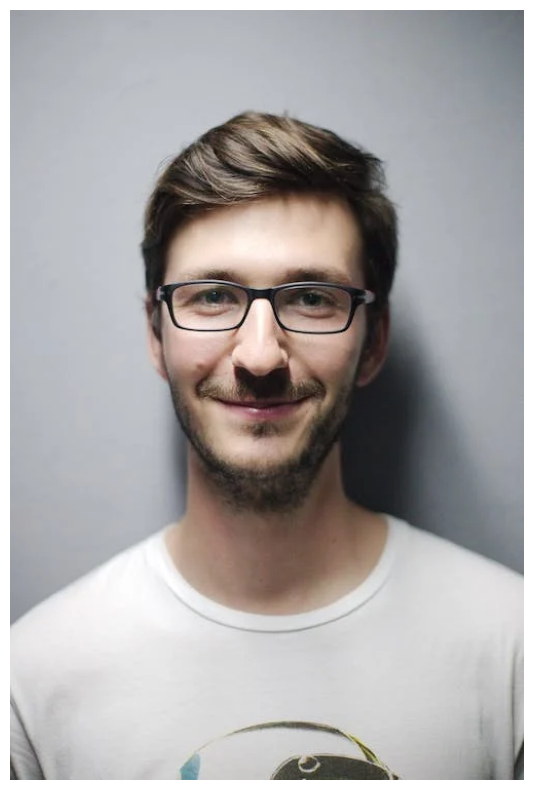

In [306]:
#open image an convert to numpy array
img = plt.imread('../../../data/pexels-photo-220453.jpg')  # select an image from the web/your pc 

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off');

OpenCV heeft ook funkties om de kleur, kleurruimte, van plaatjes te veranderen; ```COLOR_RGB2GRAY``` gaat dus van RGB (kleur) naar gray (grijswaarden). Met het commando ```plt.imshow(gray, cmap='gray')``` zorg je ervoor dat er grijswaarden in de plot gebruikt worden, anders kiest matPlotLib een stadaard kleurenschema dat niet grijs is, een soort geel radarscherm kleurschema...

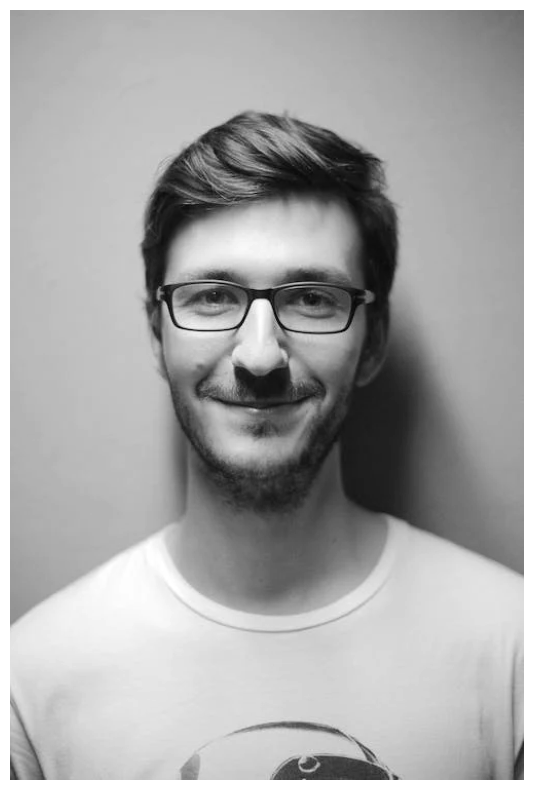

In [307]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

## Edge Detection in OpenCV

Een veel voorkomende bewerking in Computer Vision is het herkennen van randen in plaatjes. We gebruiken nu het Canny algoritme, omdat dat een van de meest gebruikte algoritmes is. Hoe Canny werkt, zal ik later nog een keer uitleggen, nu dient het gewoon als voorbeeld van edge-detection.

Het commando is ```cv.Canny(gray, 10, 40, 3, 3, True)```, waarbij ```gray``` het input plaatje is, de 10 en 40 grenzen zijn wanneer een rannd herkend wordt; je kan hier wat mee spelen. De twee 3-en zijn de grootte van het filter dat gebruikt wordt en de ```True``` zorgt ervoor dathet geavanceerde algoritme gebruikt wordt. De4ze waarden werken goed voor mijn plaatje en vast ook voor jou. Kijk anders in de documentatie van OpenCV hoe je de waarden kan aanpassen.

In [308]:
edges = cv.Canny(gray, 10, 40, 3, 3, True)

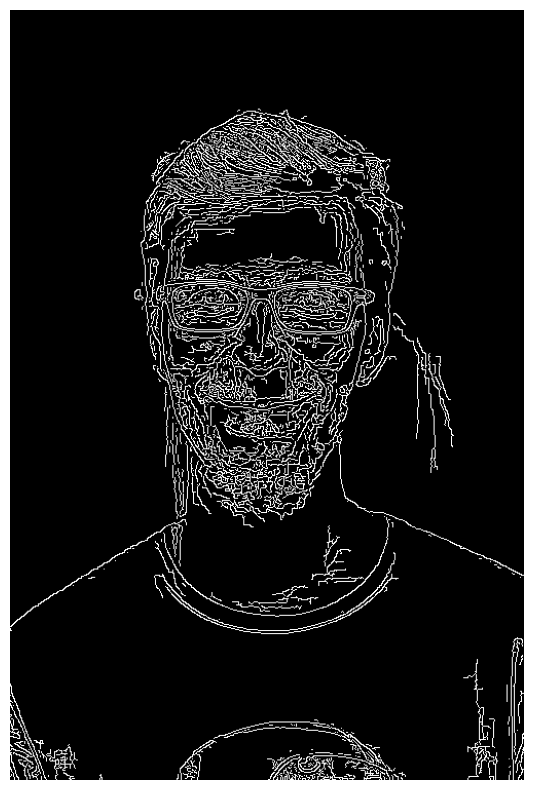

In [309]:
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.axis('off');

Je kan Canny ook op een kleurenplaatje toepassen.

In [310]:
colour_edges = cv.Canny(img, 10, 40, 3, 3, True)

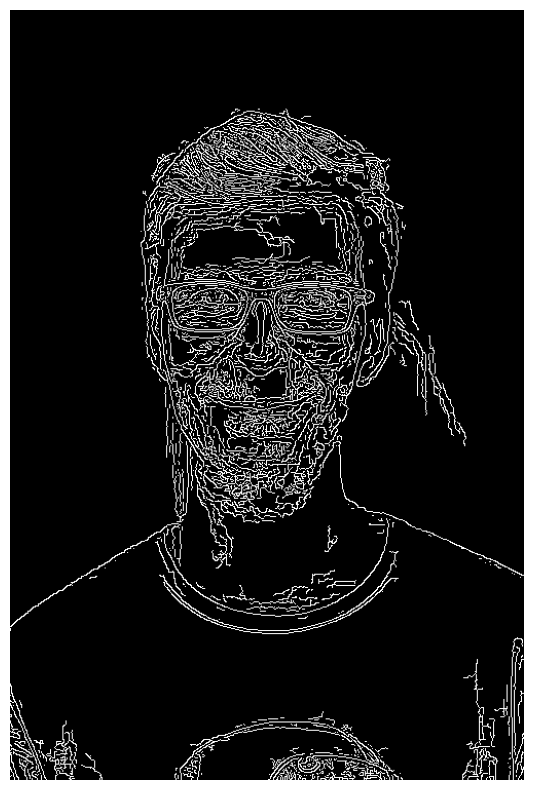

In [311]:
plt.figure(figsize=(10,10))
plt.imshow(colour_edges, cmap='gray')
plt.axis('off');

### Andere Kleurruimtes

Zoals je gezien hebt, zitten er best wat *foute* edges bij. Ook maakt de edge detector geen onderscheid tussen schaduwrandenof highlights en de *echte* randen van het object.

Zouden we hier wat aan kunnen doen?

*HSV*, Hue, Saturation en Value, is een adere manier om kleuren te beschrijven; je kent het misschien van PhotoShop. Hue is tint, Saturation is hoeveel van die tint er in zit, en Value is de helderheid. Zoals je ieronder zal zien, is Value (bijna) gelijk aan een grijswaarden plaatje.

In [312]:
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

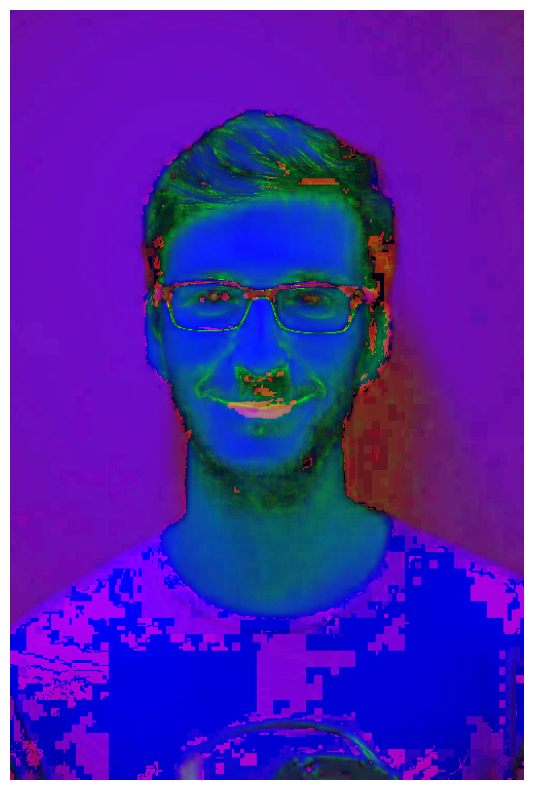

In [313]:
plt.figure(figsize=(10,10))
plt.imshow(hsv)
plt.axis('off');

Het wordt pas interessant wanneer we de kleur kanalen apart weergeven.

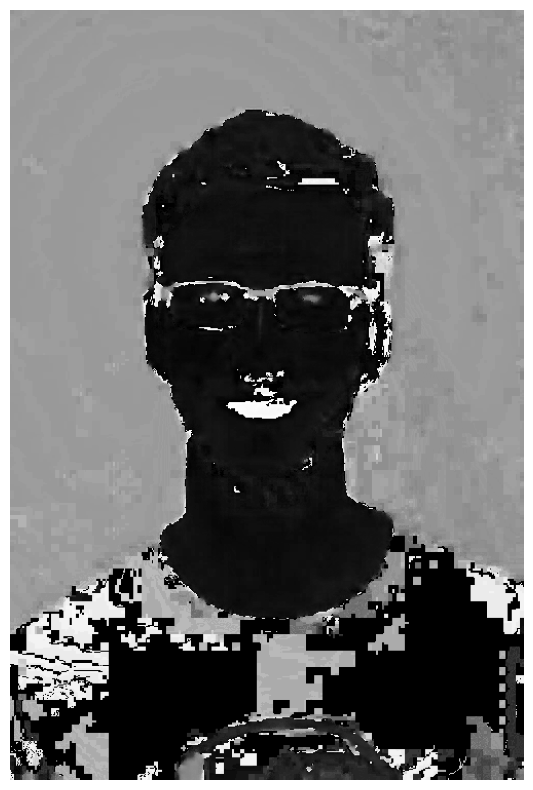

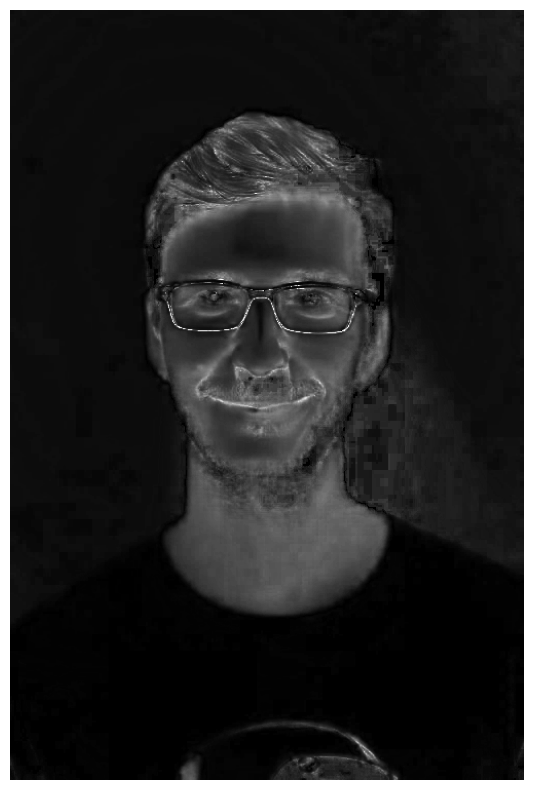

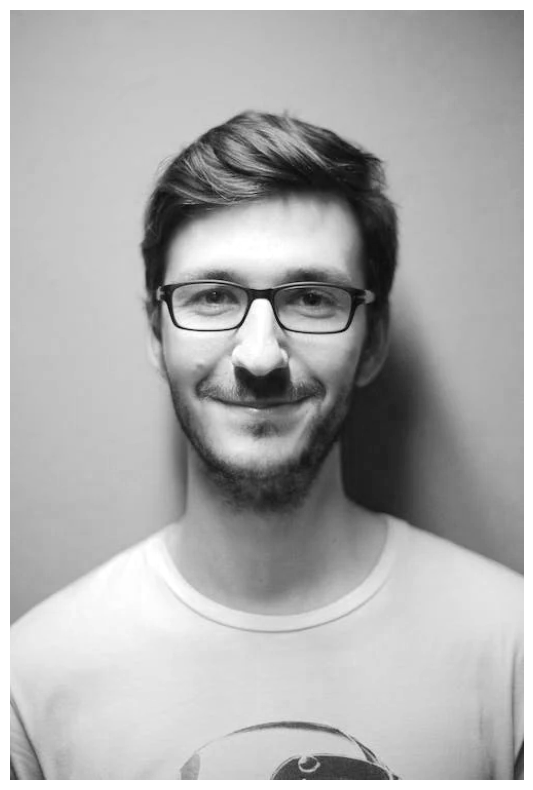

In [314]:
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,0], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,1], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,2], cmap='gray')
plt.axis('off');

Kijk wat er nu veranderd is, wanneer we Canny op de losse kleur kanalen toepassen.

In [315]:
h_edges = cv.Canny(hsv[:,:,0], 10, 40, 3, 3, True)

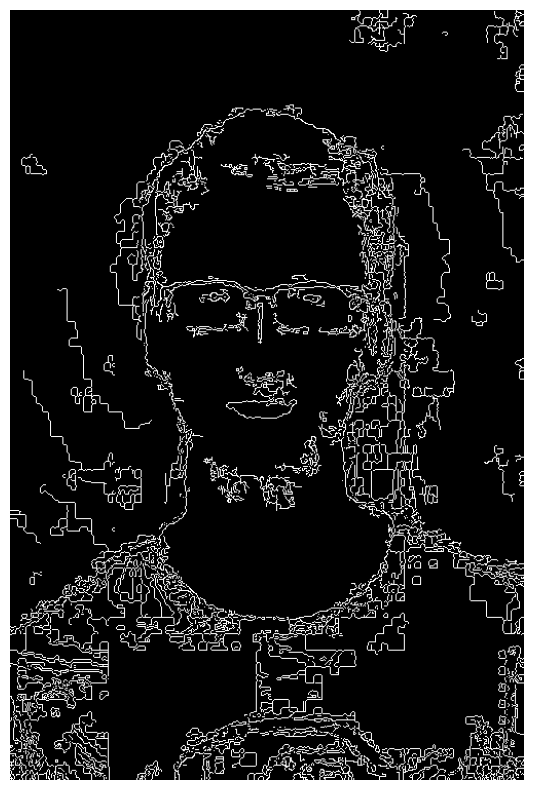

In [316]:
plt.figure(figsize=(10,10))
plt.imshow(h_edges, cmap='gray')
plt.axis('off');

## Importeer en toon afbeelding

Zoek een kleuren foto met 7 gezichten of meer.

Laad de afbeelding in.

Laat de foto op het scherm zien. Hoeveel gezichten zie je zelf?
 
Hint: `imread`, `imshow` uit de matplotlib library

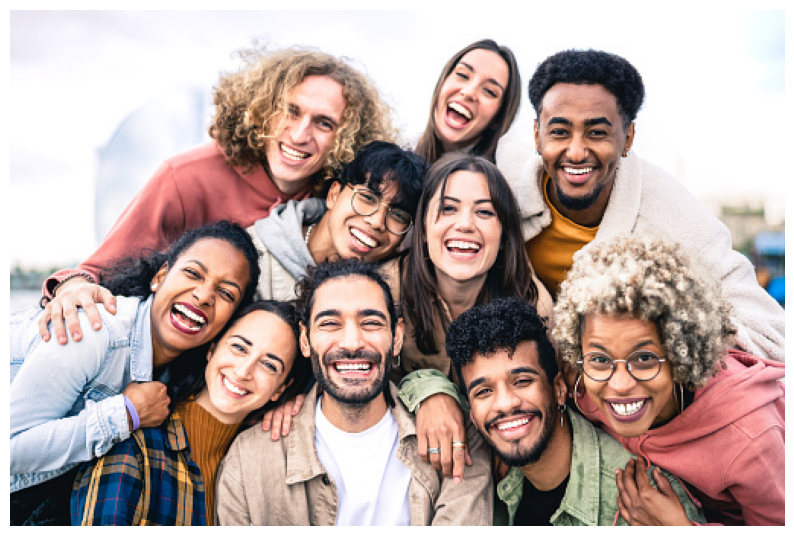

In [317]:
# jouw code

#open image an convert to numpy array
img = plt.imread('../../../data/istockphoto-1368965646-170667a.jpg')  # select an image from the web/your pc 

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off');

#ik zie zelf 10 gezichten


Welk datatype heeft de ingeladen afbeelding?


Hoe groot is de afbeelding in pixels?

In [318]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(339, 509, 3)


## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zwart-wit is dan kun je deze stap overslaan.

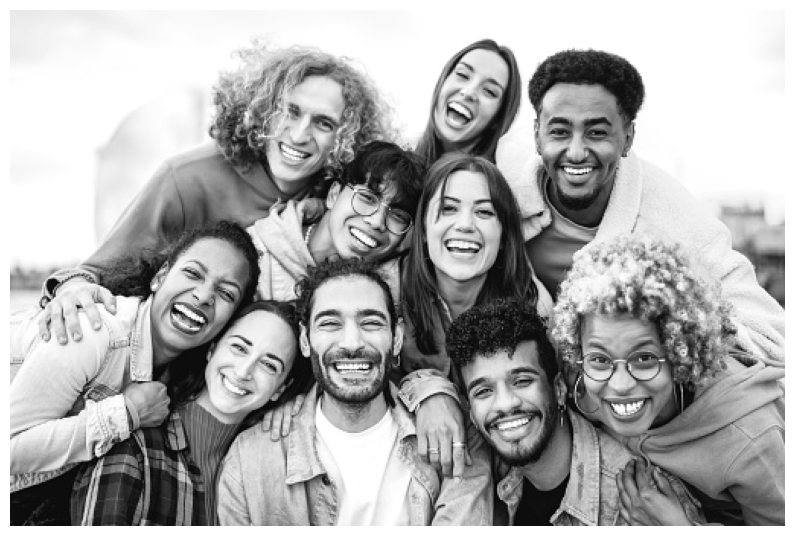

In [319]:

gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

In [320]:
gray.shape

(339, 509)

## Initieer detector

Zoek het pad van de .xml file met de classifier: haarcascade_frontalface_default.xml

Initieer de Cascade Classifier.

In [321]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Is de classifier leeg? --> " + str(face_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")

Is de classifier leeg? --> False  (moet 'False', dus 'niet leeg', zijn)


## Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [322]:
faces  = face_cascade.detectMultiScale(gray)

print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 8


## Toon rechthoeken rond gezichten

Toon rechthoeken om de gevonden gezichten.

(-0.5, 508.5, 338.5, -0.5)

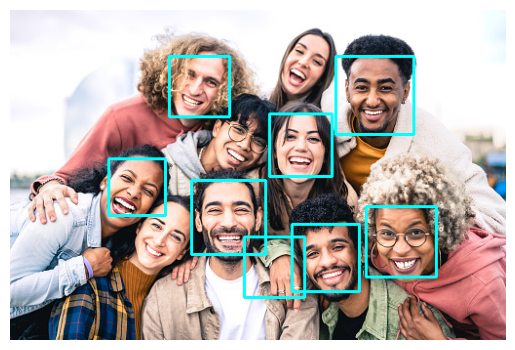

In [323]:
# jouw code
for (x,y,w,h) in faces:
   # tekent het vierkantje om het gevonden gezicht
   cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

plt.imshow(img)
plt.axis('off')



## Evalueer de resultaten

Hoe goed is jouw detector in vergelijking met wat je zelf ziet?

Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?

## Bonus 1: detecteer ook de ogen en de mond

Hint: er zijn nog meer .xml files met detectoren

Is de classifier leeg? --> True  (moet 'False', dus 'niet leeg', zijn)
Is de classifier leeg? --> True  (moet 'False', dus 'niet leeg', zijn)
Is de classifier leeg? --> True  (moet 'False', dus 'niet leeg', zijn)


[ERROR:0@842.568] global persistence.cpp:505 open Can't open file: 'haarcascade_frontalface_default.xml' in read mode
[ERROR:0@842.568] global persistence.cpp:505 open Can't open file: 'haarcascade_eye.xml' in read mode
[ERROR:0@842.568] global persistence.cpp:505 open Can't open file: 'haarcascade_mcs_mouth.xml' in read mode


error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


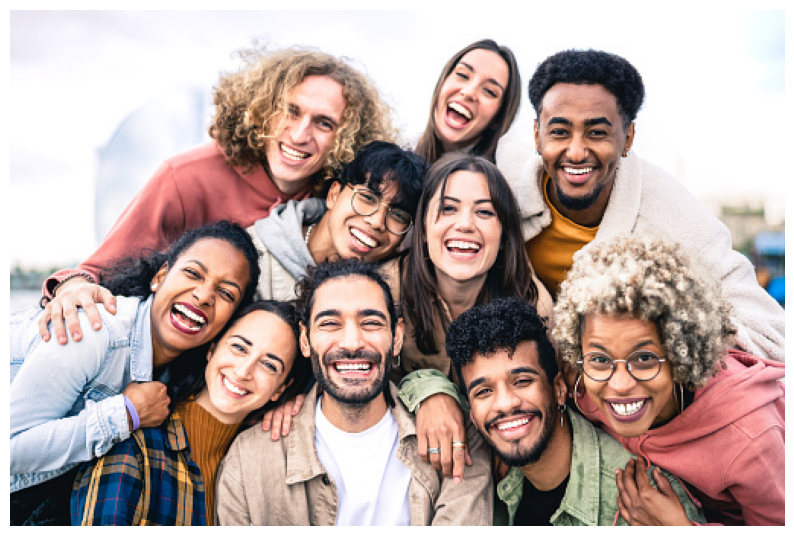

In [324]:
# jouw code
face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier("haarcascade_eye.xml")
mouth_cascade = cv.CascadeClassifier('haarcascade_mcs_mouth.xml')

img2 = plt.imread('../../../data/istockphoto-1368965646-170667a.jpg')  # select an image from the web/your pc 

plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.axis('off');

print("Is de classifier leeg? --> " + str(face_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")
print("Is de classifier leeg? --> " + str(eye_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")
print("Is de classifier leeg? --> " + str(mouth_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")
#save the image(i) in the same directory



#identify the eyes and mouth using haar-based classifiers
#eyes = eye_cascade.detectMultiScale(img2)
#mouth = mouth_cascade.detectMultiScale(img2)

faces2  = face_cascade.detectMultiScale(img2)
print("Aantal gezichten: " + str(faces2.shape[0]))



## Bonus 2: analyseer de afbeeldingen uit je webcam

Hint: ``VideoCapture()`` uit de ``OpenCV`` library

In [ ]:
# jouw code


